Plots for Frank Elastic Constants
================================================

Logarithmically spaced N values

In [1]:
import sys
sys.path.insert(1, '../wlcstat/')
import numpy as np
import pandas as pd
import scipy.special as sp
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
import wlcstat.wlcstruc as wlcstruc
import wlcstat.wlc_lcpoly as wlc_lcpoly

In [2]:
%%time

alpha_max = 10

lam0 = 1e-3
lamf = 5*1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(6,6,1)
n_length = len(length_kuhn_vec)


q_val = np.zeros((nlam, n_length))
m_val = np.zeros((nlam, n_length))
y21_y21 = np.zeros((nlam, n_length))
y21_ux_ux_y21 = np.zeros((nlam, n_length))
y21_uy_uy_y21 = np.zeros((nlam, n_length))
y21_uz_uz_y21 = np.zeros((nlam, n_length))

q_val = np.load('data_frank_1e6_2/q_val.npy')
m_val = np.load('data_frank_1e6_2/m_val.npy')
y21_y21 = np.load('data_frank_1e6_2/y21_y21.npy')
y21_ux_ux_y21 = np.load('data_frank_1e6_2/y21_ux_ux_y21.npy')
y21_uy_uy_y21 = np.load('data_frank_1e6_2/y21_uy_uy_y21.npy')
y21_uz_uz_y21 = np.load('data_frank_1e6_2/y21_uz_uz_y21.npy')


r_2_par = np.zeros((nlam, n_length))
r_2_perp = np.zeros((nlam, n_length))
xi_par = np.zeros((nlam, n_length))
xi_perp = np.zeros((nlam, n_length))


for i in range(nlam):
        lam_i = lam[i]
        for i_l in range(len(length_kuhn_vec)):
            length_kuhn = length_kuhn_vec[i_l]
            r_2_par[i, i_l], r_2_perp[i, i_l], xi_par[i, i_l], xi_perp[i, i_l] = wlc_lcpoly.r_2_lcpoly(length_kuhn, 
                                                                                                        lam_i, alpha_max=10)

/Users/asheshghosh/Documents/Research/Project/Liquid_Crystal/lc_thermo/wlcstat/wlc_lcpoly.py:202: RuntimeWarning: divide by zero encountered in double_scalars
  xi_par = - 1 / poles_m0[1]


CPU times: user 2.41 s, sys: 6.81 ms, total: 2.41 s
Wall time: 2.42 s


In [94]:
5/(4*np.pi)*k_twist[lam_c+i]/1e6/xi_perp[lam_c+i,:]**(3/2)/3

array([0.84383956])

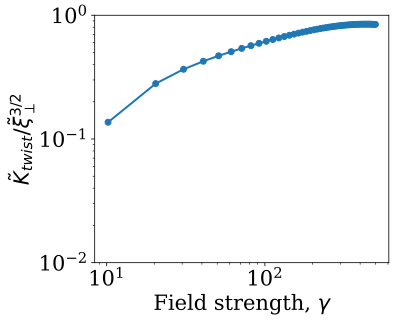

In [3]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

i_l = 0

for i_l in range(len(m_val[0,:])):
    #k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    #k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    y_2 = np.zeros(nlam-lam_c)
    y_3 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]
        #y_1[i] = 5/(4*np.pi)*k_twist[lam_c+i]/1e6/xi_perp[i,:]**(4/3)/3 * xi_par[i,:]**(1/3)
        y_1[i] = 5/(4*np.pi)*k_twist[lam_c+i]/1e6/3 / xi_perp[lam_c+i,:]**(3/2)
        #y_2[i] = 5/(4*np.pi)*k_bend[lam_c+i]/length_kuhn_vec[i_l]/3
        #y_3[i] = 5/(4*np.pi)*k_splay[lam_c+i]/length_kuhn_vec[i_l]/3
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    #plt.subplot(1, 3, 1)
    plt.loglog(x_1, y_1,'o-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-2,1e0)
    #plt.xlim(0,500)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'Field strength, $\gamma $')
    plt.ylabel(r'$\tilde{K}_{twist}/ \tilde{\xi}_{\perp}^{3/2}$')
    #plt.xticks(np.arange(0,501,100))
    
plt.tight_layout()
#plt.savefig('K_twist_by_xiperp2.pdf')
plt.show()

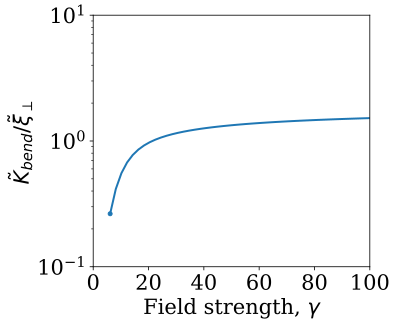

In [11]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

i_l = 0
l_kuhn = 1e6

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    #k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    #k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    y_2 = np.zeros(nlam-lam_c)
    y_3 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]
        y_1[i] = 5/(4*np.pi)*k_bend[lam_c+i]/l_kuhn/xi_perp[i_l,:]/3
        #y_2[i] = 5/(4*np.pi)*k_bend[lam_c+i]/length_kuhn_vec[i_l]/3
        #y_3[i] = 5/(4*np.pi)*k_splay[lam_c+i]/length_kuhn_vec[i_l]/3
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    #plt.subplot(1, 3, 1)
    plt.semilogy(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-1,1e1)
    plt.xlim(0,100)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'Field strength, $\gamma $')
    plt.ylabel(r'$\tilde{K}_{bend}/ \tilde{\xi}_{\perp}$')
    plt.xticks(np.arange(0,101,20))
    
plt.tight_layout()
#plt.savefig('K_twist_by_xiperp.pdf')
plt.show()

In [3]:
alpha_max = 10

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,2,7)
n_length = len(length_kuhn_vec)

q_val = np.zeros((nlam, n_length))
m_val = np.zeros((nlam, n_length))
y21_y21 = np.zeros((nlam, n_length))
y21_ux_ux_y21 = np.zeros((nlam, n_length))
y21_uy_uy_y21 = np.zeros((nlam, n_length))
y21_uz_uz_y21 = np.zeros((nlam, n_length))

q_val = np.load('data_fe_log/q_val.npy')
m_val = np.load('data_fe_log/m_val.npy')
y21_y21 = np.load('data_fe_log/y21_y21.npy')
y21_ux_ux_y21 = np.load('data_fe_log/y21_ux_ux_y21.npy')
y21_uy_uy_y21 = np.load('data_fe_log/y21_uy_uy_y21.npy')
y21_uz_uz_y21 = np.load('data_fe_log/y21_uz_uz_y21.npy')

# Splay, Bend and Twist vs a

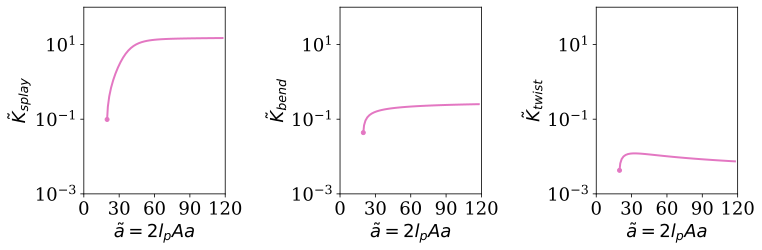

In [16]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(11,4))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,2,7)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(6,len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    y_2 = np.zeros(nlam-lam_c)
    y_3 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = 5/(4*np.pi)*k_twist[lam_c+i]/length_kuhn_vec[i_l]/3
        y_2[i] = 5/(4*np.pi)*k_bend[lam_c+i]/length_kuhn_vec[i_l]/3
        y_3[i] = 5/(4*np.pi)*k_splay[lam_c+i]/length_kuhn_vec[i_l]/3
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.subplot(1, 3, 1)
    plt.semilogy(x_1, y_3,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_3[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-3,1e2)
    plt.xlim(0,120)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$\tilde{K}_{splay}$')
    plt.xticks(np.arange(0,121,30))
    
     #***********************************#
    plt.subplot(1, 3, 2)
    plt.semilogy(x_1, y_2,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_2[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-3,1e2)
    plt.xlim(0,120)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$\tilde{K}_{bend}$')
#    plt.xticks(np.arange(0,121,30))
    plt.xticks(np.arange(0,121,30))
    
    #***********************************#
    plt.subplot(1, 3, 3)
    plt.semilogy(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-3,1e2)
    plt.xlim(0,120)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$\tilde{K}_{twist}$')
    plt.xticks(np.arange(0,121,30))
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
#plt.xticks(np.arange(0,121,30))
plt.tight_layout()
plt.savefig('K_N=0.1_log_lin.pdf')
plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 5

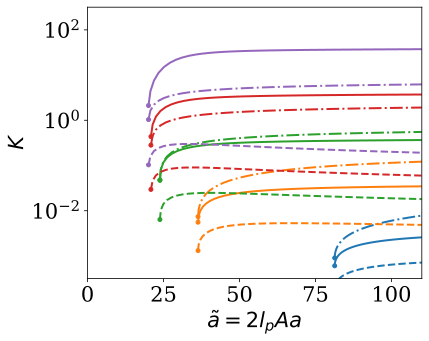

In [8]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    y_2 = np.zeros(nlam-lam_c)
    y_3 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_twist[lam_c+i] / 3
        y_2[i] = k_bend[lam_c+i] / 3
        y_3[i] = k_splay[lam_c+i] / 3
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    #plt.subplot(1, 3, 1)
    plt.semilogy(x_1, y_3,'-',color='C'+str(i_l),linewidth=2,label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_3[0]], marker="o",color='C'+str(i_l), markersize=4)
    #plt.ylim(1e-3,1e3)
    #plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    #plt.xlabel(r'$\tilde{a}=2l_pAa$')
    #plt.ylabel(r'$K_{splay}$')
    #plt.subplot(1, 3, 2)
    plt.semilogy(x_1, y_2,'-.',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_2[0]], marker="o",color='C'+str(i_l), markersize=4)
    #plt.ylim(1e-3,1e2)
    #plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    #plt.xlabel(r'$\tilde{a}=2l_pAa$')
    #plt.ylabel(r'$K_{bend}$')
    #plt.subplot(1, 3, 3)
    plt.semilogy(x_1, y_1,'--',color='C'+str(i_l),linewidth=2,label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(10**(-3.5),10**(2.5))
    plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K$')
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_all.pdf')
plt.show()

# Twist rigidity

IndexError: index 5 is out of bounds for axis 0 with size 5

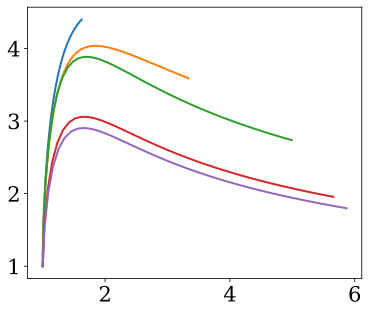

In [11]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_twist[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.plot(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    
plt.xlabel(r'$\tilde{a}/\tilde{a}_c$')
plt.ylabel(r'$K_{twist}/K_{twist}^{(c)}$')
plt.xlim(0.99,3)
plt.ylim(0.99,4)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

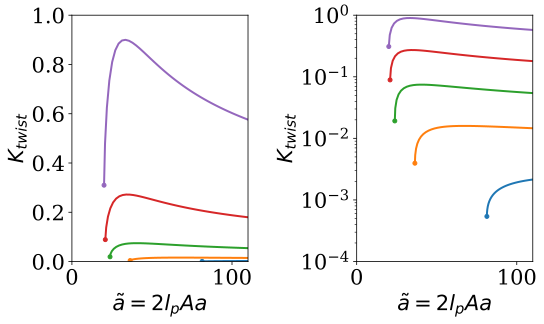

In [6]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_twist[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.subplot(1, 2, 1)
    plt.plot(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.plot([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(0,1)
    plt.xlim(0,110)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{twist}$')
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.subplot(1, 2, 2)
    plt.semilogy(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-4,1e0)
    plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{twist}$')
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

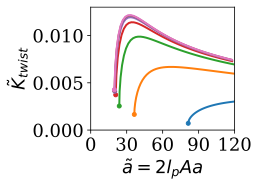

In [5]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(4,3))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,2,7)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = 5/(4*np.pi)*k_twist[lam_c+i]/length_kuhn_vec[i_l] / 3
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    #plt.subplot(1, 2, 1)
    plt.plot(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.plot([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(0,0.013)
    plt.xlim(0,110)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$\tilde{K}_{twist}$')
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xticks(np.arange(0,121,30))
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
plt.savefig('K_twist_linscale.pdf')
plt.show()

# Bend rigidity

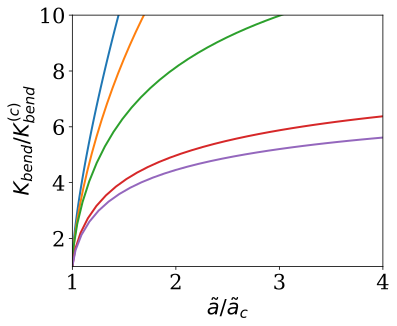

In [8]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_bend[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.plot(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    
plt.xlabel(r'$\tilde{a}/\tilde{a}_c$')
plt.ylabel(r'$K_{bend}/K_{bend}^{(c)}$')
plt.xlim(1.,4)
plt.ylim(1,10)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

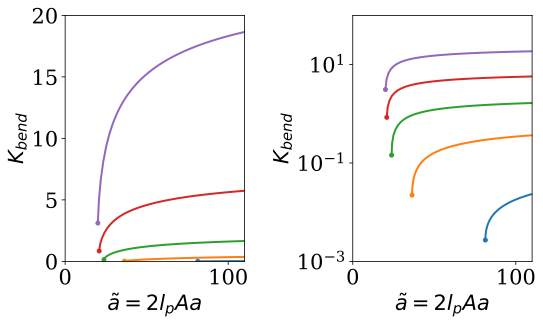

In [9]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_bend[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.subplot(1, 2, 1)
    plt.plot(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.plot([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(0,20)
    plt.xlim(0,110)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{bend}$')
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.subplot(1, 2, 2)
    plt.semilogy(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-3,1e2)
    plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{bend}$')
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

# Splay rigidity

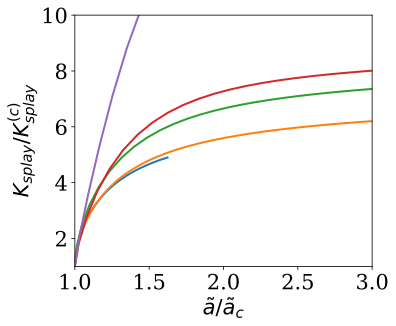

In [10]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_splay[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.plot(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    
plt.xlabel(r'$\tilde{a}/\tilde{a}_c$')
plt.ylabel(r'$K_{splay}/K_{splay}^{(c)}$')
plt.xlim(1.,3)
plt.ylim(1,10)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

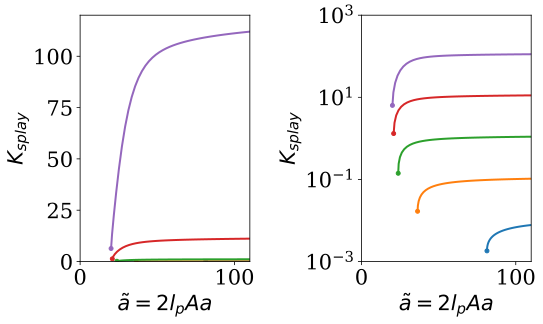

In [11]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[0,:])):
    k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
    k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
    ap = lam/m_val[:,i_l]
    c = min(ap)
    ap_c = ap.tolist()
    lam_c = ap_c.index(c)
    x_1 = np.zeros(nlam-lam_c)
    y_1 = np.zeros(nlam-lam_c)
    
    for i in range(nlam-lam_c):
        x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
        y_1[i] = k_splay[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)
    plt.subplot(1, 2, 1)
    plt.plot(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.plot([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(0,120)
    plt.xlim(0,110)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{splay}$')
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.subplot(1, 2, 2)
    plt.semilogy(x_1, y_1,'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=4)
    plt.ylim(1e-3,1e3)
    plt.xlim(0,110)
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
    plt.xlabel(r'$\tilde{a}=2l_pAa$')
    plt.ylabel(r'$K_{splay}$')
    
#plt.xlabel(r'$\tilde{a}=2l_pAa$')
#plt.ylabel(r'$K_{twist}$')
#plt.xlim(0,110)
#plt.ylim(0,1)
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()

# Twist, Bend and Splay for fixed N

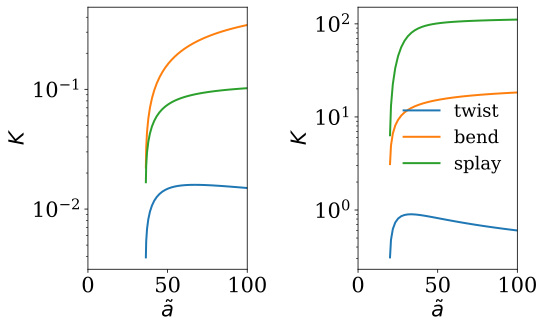

In [12]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(8,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 21}
plt.rc('font', **font)

lam0 = 1e-3
lamf = 1e2
nlam = 50
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-1,1,5)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 1


k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
ap = lam/m_val[:,i_l]
c = min(ap)
ap_c = ap.tolist()
lam_c = ap_c.index(c)
x_1 = np.zeros(nlam-lam_c)
y_1 = np.zeros(nlam-lam_c)
y_2 = np.zeros(nlam-lam_c)
y_3 = np.zeros(nlam-lam_c)
    
for i in range(nlam-lam_c):
    x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
    y_1[i] = k_twist[lam_c+i]
    y_2[i] = k_bend[lam_c+i]
    y_3[i] = k_splay[lam_c+i]
        
    #plt.semilogy(x_1/[x_1[0]], y_1/[y_1[0]],'-',color='C'+str(i_l),linewidth=2)

plt.subplot(1, 2, 1)    
plt.semilogy(x_1, y_1,'-',linewidth=2,label ='twist')
plt.semilogy(x_1, y_2,'-',linewidth=2,label ='bend')
plt.semilogy(x_1, y_3,'-',linewidth=2,label ='splay')
    #plt.semilogy([x_1[0]], [y_1[0]], marker="o",color='C'+str(i_l), markersize=8)
plt.xlabel(r'$\tilde{a}$')
plt.ylabel(r'$K$')
plt.xlim(0.,100)
#plt.ylim(0.99,5)
#plt.legend(frameon=False,fontsize=18)
    
i_l = 4


k_bend = 3 * m_val[:, i_l] ** 2 * y21_uz_uz_y21[:, i_l] / y21_y21[:, i_l] ** 2
k_twist = 3 * m_val[:, i_l] ** 2 * y21_uy_uy_y21[:, i_l] / y21_y21[:, i_l] ** 2
k_splay = 3 * m_val[:, i_l] ** 2 * y21_ux_ux_y21[:, i_l] / y21_y21[:, i_l] ** 2
    
ap = lam/m_val[:,i_l]
c = min(ap)
ap_c = ap.tolist()
lam_c = ap_c.index(c)
x_1 = np.zeros(nlam-lam_c)
y_1 = np.zeros(nlam-lam_c)
y_2 = np.zeros(nlam-lam_c)
y_3 = np.zeros(nlam-lam_c)
    
for i in range(nlam-lam_c):
    x_1[i] = lam[lam_c+i]/m_val[lam_c+i,i_l]
    y_1[i] = k_twist[lam_c+i]
    y_2[i] = k_bend[lam_c+i]
    y_3[i] = k_splay[lam_c+i]
plt.subplot(1, 2, 2)
plt.semilogy(x_1, y_1,'-',linewidth=2,label ='twist')
plt.semilogy(x_1, y_2,'-',linewidth=2,label ='bend')
plt.semilogy(x_1, y_3,'-',linewidth=2,label ='splay')

    
plt.xlabel(r'$\tilde{a}$')
plt.ylabel(r'$K$')
plt.xlim(0.,100)
#plt.ylim(0.99,5)
plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
plt.savefig('K_tbs.pdf')
plt.show()

# N dependence of Frank elastic constants

In [2]:
import math   
alpha_max = 10

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)


q_val = np.zeros((nlam, n_length))
m_val = np.zeros((nlam, n_length))
y21_y21 = np.zeros((nlam, n_length))
y21_ux_ux_y21 = np.zeros((nlam, n_length))
y21_uy_uy_y21 = np.zeros((nlam, n_length))
y21_uz_uz_y21 = np.zeros((nlam, n_length))

q_val = np.load('data_N/q_val.npy')
m_val = np.load('data_N/m_val.npy')
y21_y21 = np.load('data_N/y21_y21.npy')
y21_ux_ux_y21 = np.load('data_N/y21_ux_ux_y21.npy')
y21_uy_uy_y21 = np.load('data_N/y21_uy_uy_y21.npy')
y21_uz_uz_y21 = np.load('data_N/y21_uz_uz_y21.npy')

In [3]:
r_2_par = np.zeros((nlam, n_length))
r_2_perp = np.zeros((nlam, n_length))
xi_par = np.zeros((nlam, n_length))
xi_perp = np.zeros((nlam, n_length))

for i in range(nlam):
        lam_i = lam[i]
        for i_l in range(len(length_kuhn_vec)):
            length_kuhn = length_kuhn_vec[i_l]
            r_2_par[i, i_l], r_2_perp[i, i_l], xi_par[i, i_l], xi_perp[i, i_l] = wlc_lcpoly.r_2_lcpoly(length_kuhn, 
                                                                                                        lam_i, alpha_max=10)

In [5]:
range(len(m_val[:,0]))

range(0, 5)

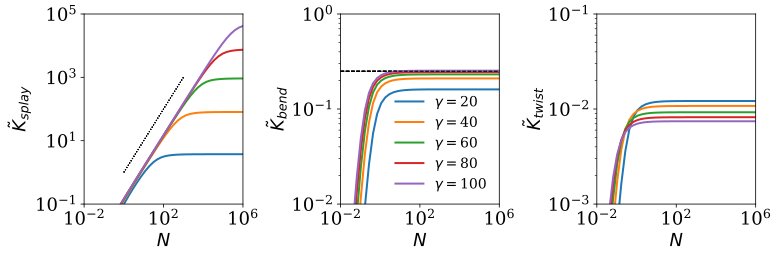

In [33]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(11,4))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

length_kuhn_vec_scale = np.logspace(0,3,40)

i_l = 0

for i_l in range(len(m_val[:,0])):
    k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    plt.subplot(1, 3, 1)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_splay/m_val[i_l,:] ** 0/length_kuhn_vec / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma=$'+str(math.ceil(lam[i_l])))
    plt.xlabel(r'$N$')
    #plt.ylabel(r'$K_{splay}/{(\bar{\phi}_{2}^{0})}^2$')
    plt.ylabel(r'$\tilde{K}_{splay}$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-1,1e5)
    plt.loglog(length_kuhn_vec_scale, length_kuhn_vec_scale,':',color='k',linewidth=1)
    #plt.loglog(0.05*length_kuhn_vec_scale, length_kuhn_vec_scale ** 2,'--',color='k',linewidth=1)
    
    #*********************************#  
    plt.subplot(1, 3, 2)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_bend/m_val[i_l,:] ** 0/length_kuhn_vec / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma=$'+str(math.ceil(lam[i_l])))
    plt.xlabel(r'$N$')
    #plt.ylabel(r'$K_{bend}/{(\bar{\phi}_{2}^{0})}^2$')
    plt.ylabel(r'$\tilde{K}_{bend}$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-2,1e0)
    plt.loglog(10 * length_kuhn_vec_scale, 10*length_kuhn_vec_scale,':',color='k',linewidth=1)
    plt.loglog(length_kuhn_vec, 0.25 * length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    plt.legend(frameon=False,fontsize=14)
    
    #*********************************#  
    plt.subplot(1, 3, 3)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_twist/m_val[i_l,:] ** 0/length_kuhn_vec / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma=$'+str(math.ceil(lam[i_l])))
    #plt.loglog(100 * length_kuhn_vec_scale, 5 * length_kuhn_vec_scale,':',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, 0.1* xi_perp[i_l,:],'--',color='C'+str(i_l),linewidth=1)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\tilde{K}_{twist}$')
    #plt.ylabel(r'$K_{twist}/{(\bar{\phi}_{2}^{0})}^2$')
    plt.xlim(1e-2,10**6.)
    plt.ylim(1e-3,1e-1)
    #plt.legend(frameon=False,fontsize=14)
plt.tight_layout()
plt.savefig('K_vs_N.pdf')
plt.show()

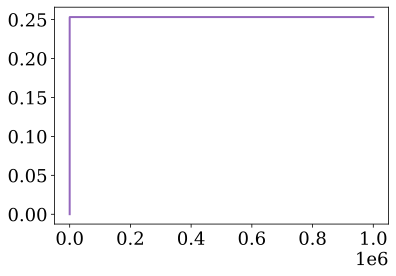

In [26]:
plt.plot(length_kuhn_vec, 5/(4*np.pi)* k_bend/m_val[i_l,:] ** 0/length_kuhn_vec / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma=$'+str(math.ceil(lam[i_l])))

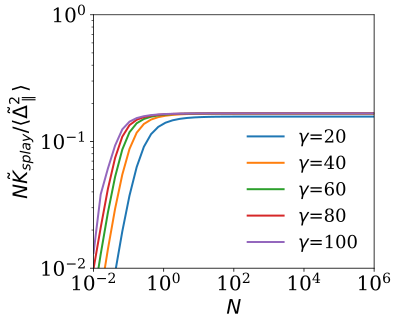

In [4]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 20}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[:,0])):
    #k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    #k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    #plt.subplot(1, 3, 1)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_splay/r_2_par[i_l,:]/3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    #plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$N\tilde{K}_{splay}/\langle \tilde{\Delta}_{\parallel}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-2,1e0)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    
plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
plt.savefig('K_splay_by_Delta2.pdf')
plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 5

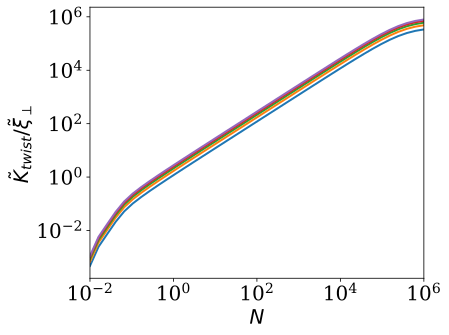

In [43]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,5))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 20}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[:,0])):
    #k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    #k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    #plt.subplot(1, 3, 1)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_splay/length_kuhn_vec/xi_perp[i_l,:]/3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    #plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$\tilde{K}_{twist}/\tilde{\xi}_{\perp}$')
    plt.xlim(1e-2,1e6)
    #plt.ylim(1e-2,1e0)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    
plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
plt.savefig('K_twist.pdf')
plt.show()

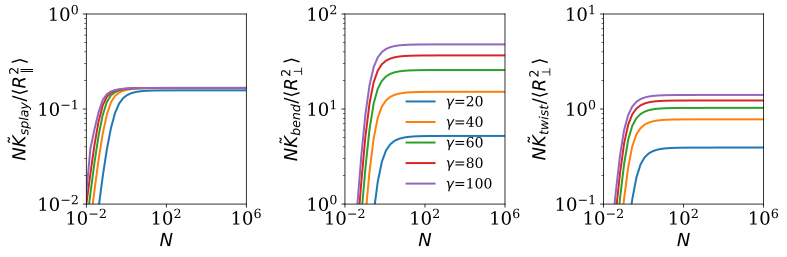

In [15]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(11.1,4))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[:,0])):
    k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    plt.subplot(1, 3, 1)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_splay/r_2_par[i_l,:] / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    #plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$N\tilde{K}_{splay}/\langle R_{\parallel}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-2,1e0)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    
    #*********************************#    
    plt.subplot(1, 3, 2)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_bend/r_2_perp[i_l,:] / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    #plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$N\tilde{K}_{bend}/\langle R_{\perp}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e0,1e2)
    plt.legend(frameon=False,fontsize=14)
    
    #*********************************#    
    plt.subplot(1, 3, 3)
    plt.loglog(length_kuhn_vec, 5/(4*np.pi)* k_twist/r_2_perp[i_l,:] / 3,'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    #plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$N\tilde{K}_{twist}/\langle R_{\perp}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-1,1e1)
    
#plt.legend(frameon=False,fontsize=12)
plt.tight_layout()
plt.savefig('K_scaled_r2.pdf')
plt.show()

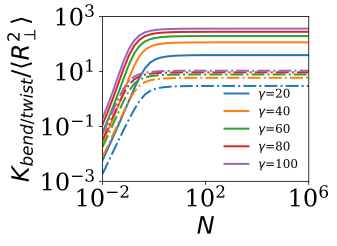

In [38]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(5,4))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 24}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[:,0])):
    k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    #plt.subplot(1, 3, 1)
    plt.loglog(length_kuhn_vec, k_bend/r_2_perp[i_l,:],'-',color='C'+str(i_l),linewidth=2,
                    label ='$\gamma$='+str(math.ceil(lam[i_l])))
    plt.loglog(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-.',color='C'+str(i_l),linewidth=2)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$K_{bend/twist}/\langle R_{\perp}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-3,1e3)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    
plt.legend(frameon=False,fontsize=12)
plt.tight_layout()
plt.savefig('K_bend_twist.pdf')
plt.show()

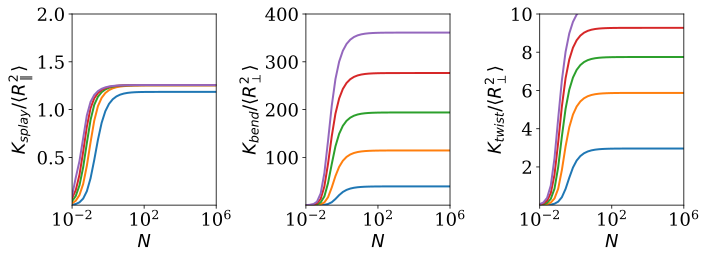

In [17]:
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(10,4))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

lam0 = 2*1e1
lamf = 1e2
nlam = 5
lam = np.linspace(lam0, lamf, nlam)
length_kuhn_vec = np.logspace(-2,6,40)
n_length = len(length_kuhn_vec)

#q_val_rr, m_val_rr, y21_y21_rr, y21_ux_ux_y21_rr, y21_uy_uy_y21_rr, y21_uz_uz_y21_rr = (
#wlc_lcpoly.elastic_rr(length_kuhn_vec, lam))

i_l = 0

for i_l in range(len(m_val[:,0])):
    k_bend = 3 * m_val[i_l,:] ** 2 * y21_uz_uz_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_twist = 3 * m_val[i_l,:] ** 2 * y21_uy_uy_y21[i_l,:] / y21_y21[i_l,:] ** 2
    k_splay = 3 * m_val[i_l,:] ** 2 * y21_ux_ux_y21[i_l,:] / y21_y21[i_l,:] ** 2
    
    #*********************************#    
    plt.subplot(1, 3, 1)
    plt.semilogx(length_kuhn_vec, k_splay/r_2_par[i_l,:],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.xlabel(r'$N$')
    plt.ylabel(r'$K_{splay}/\langle R_{\parallel}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-3,2*1e0)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec ** 0,'--',color='k',linewidth=1)
    #*********************************#  
    plt.subplot(1, 3, 2)
    plt.semilogx(length_kuhn_vec, k_bend/r_2_perp[i_l,:],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    plt.xlabel(r'$N$')
    plt.ylabel(r'$K_{bend}/\langle R_{\perp}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-3,4*1e2)
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, 2*length_kuhn_vec ** (-1),'--',color='k',linewidth=1)
    
    #*********************************#  
    plt.subplot(1, 3, 3)
    plt.semilogx(length_kuhn_vec, k_twist/r_2_perp[i_l,:],'-',color='C'+str(i_l),linewidth=2,
                    label ='N='+str(length_kuhn_vec[i_l]))
    #plt.loglog(length_kuhn_vec, length_kuhn_vec,'--',color='k',linewidth=1)
    #plt.loglog(length_kuhn_vec, 0.07*length_kuhn_vec ** (-1),'--',color='k',linewidth=1)
    plt.xlabel(r'$N$')
    plt.ylabel(r'$K_{twist}/\langle R_{\perp}^2\rangle$')
    plt.xlim(1e-2,1e6)
    plt.ylim(1e-3,1e1)
    
#plt.legend(frameon=False,fontsize=18)
plt.tight_layout()
#plt.savefig('K_splay.pdf')
plt.show()